當前工作目錄 ==> D:\0_sdr\SSNP3D\1_STL
Left Down point: 0 0
Right Up point:  4000 7800
height (min, max) 0.0 357.21


array([   0,   20,   40,   60,   80,  100,  120,  140,  160,  180,  200,
        220,  240,  260,  280,  300,  320,  340,  360,  380,  400,  420,
        440,  460,  480,  500,  520,  540,  560,  580,  600,  620,  640,
        660,  680,  700,  720,  740,  760,  780,  800,  820,  840,  860,
        880,  900,  920,  940,  960,  980, 1000, 1020, 1040, 1060, 1080,
       1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300,
       1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520,
       1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740,
       1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960,
       1980, 2000, 2020, 2040, 2060, 2080, 2100, 2120, 2140, 2160, 2180,
       2200, 2220, 2240, 2260, 2280, 2300, 2320, 2340, 2360, 2380, 2400,
       2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620,
       2640,

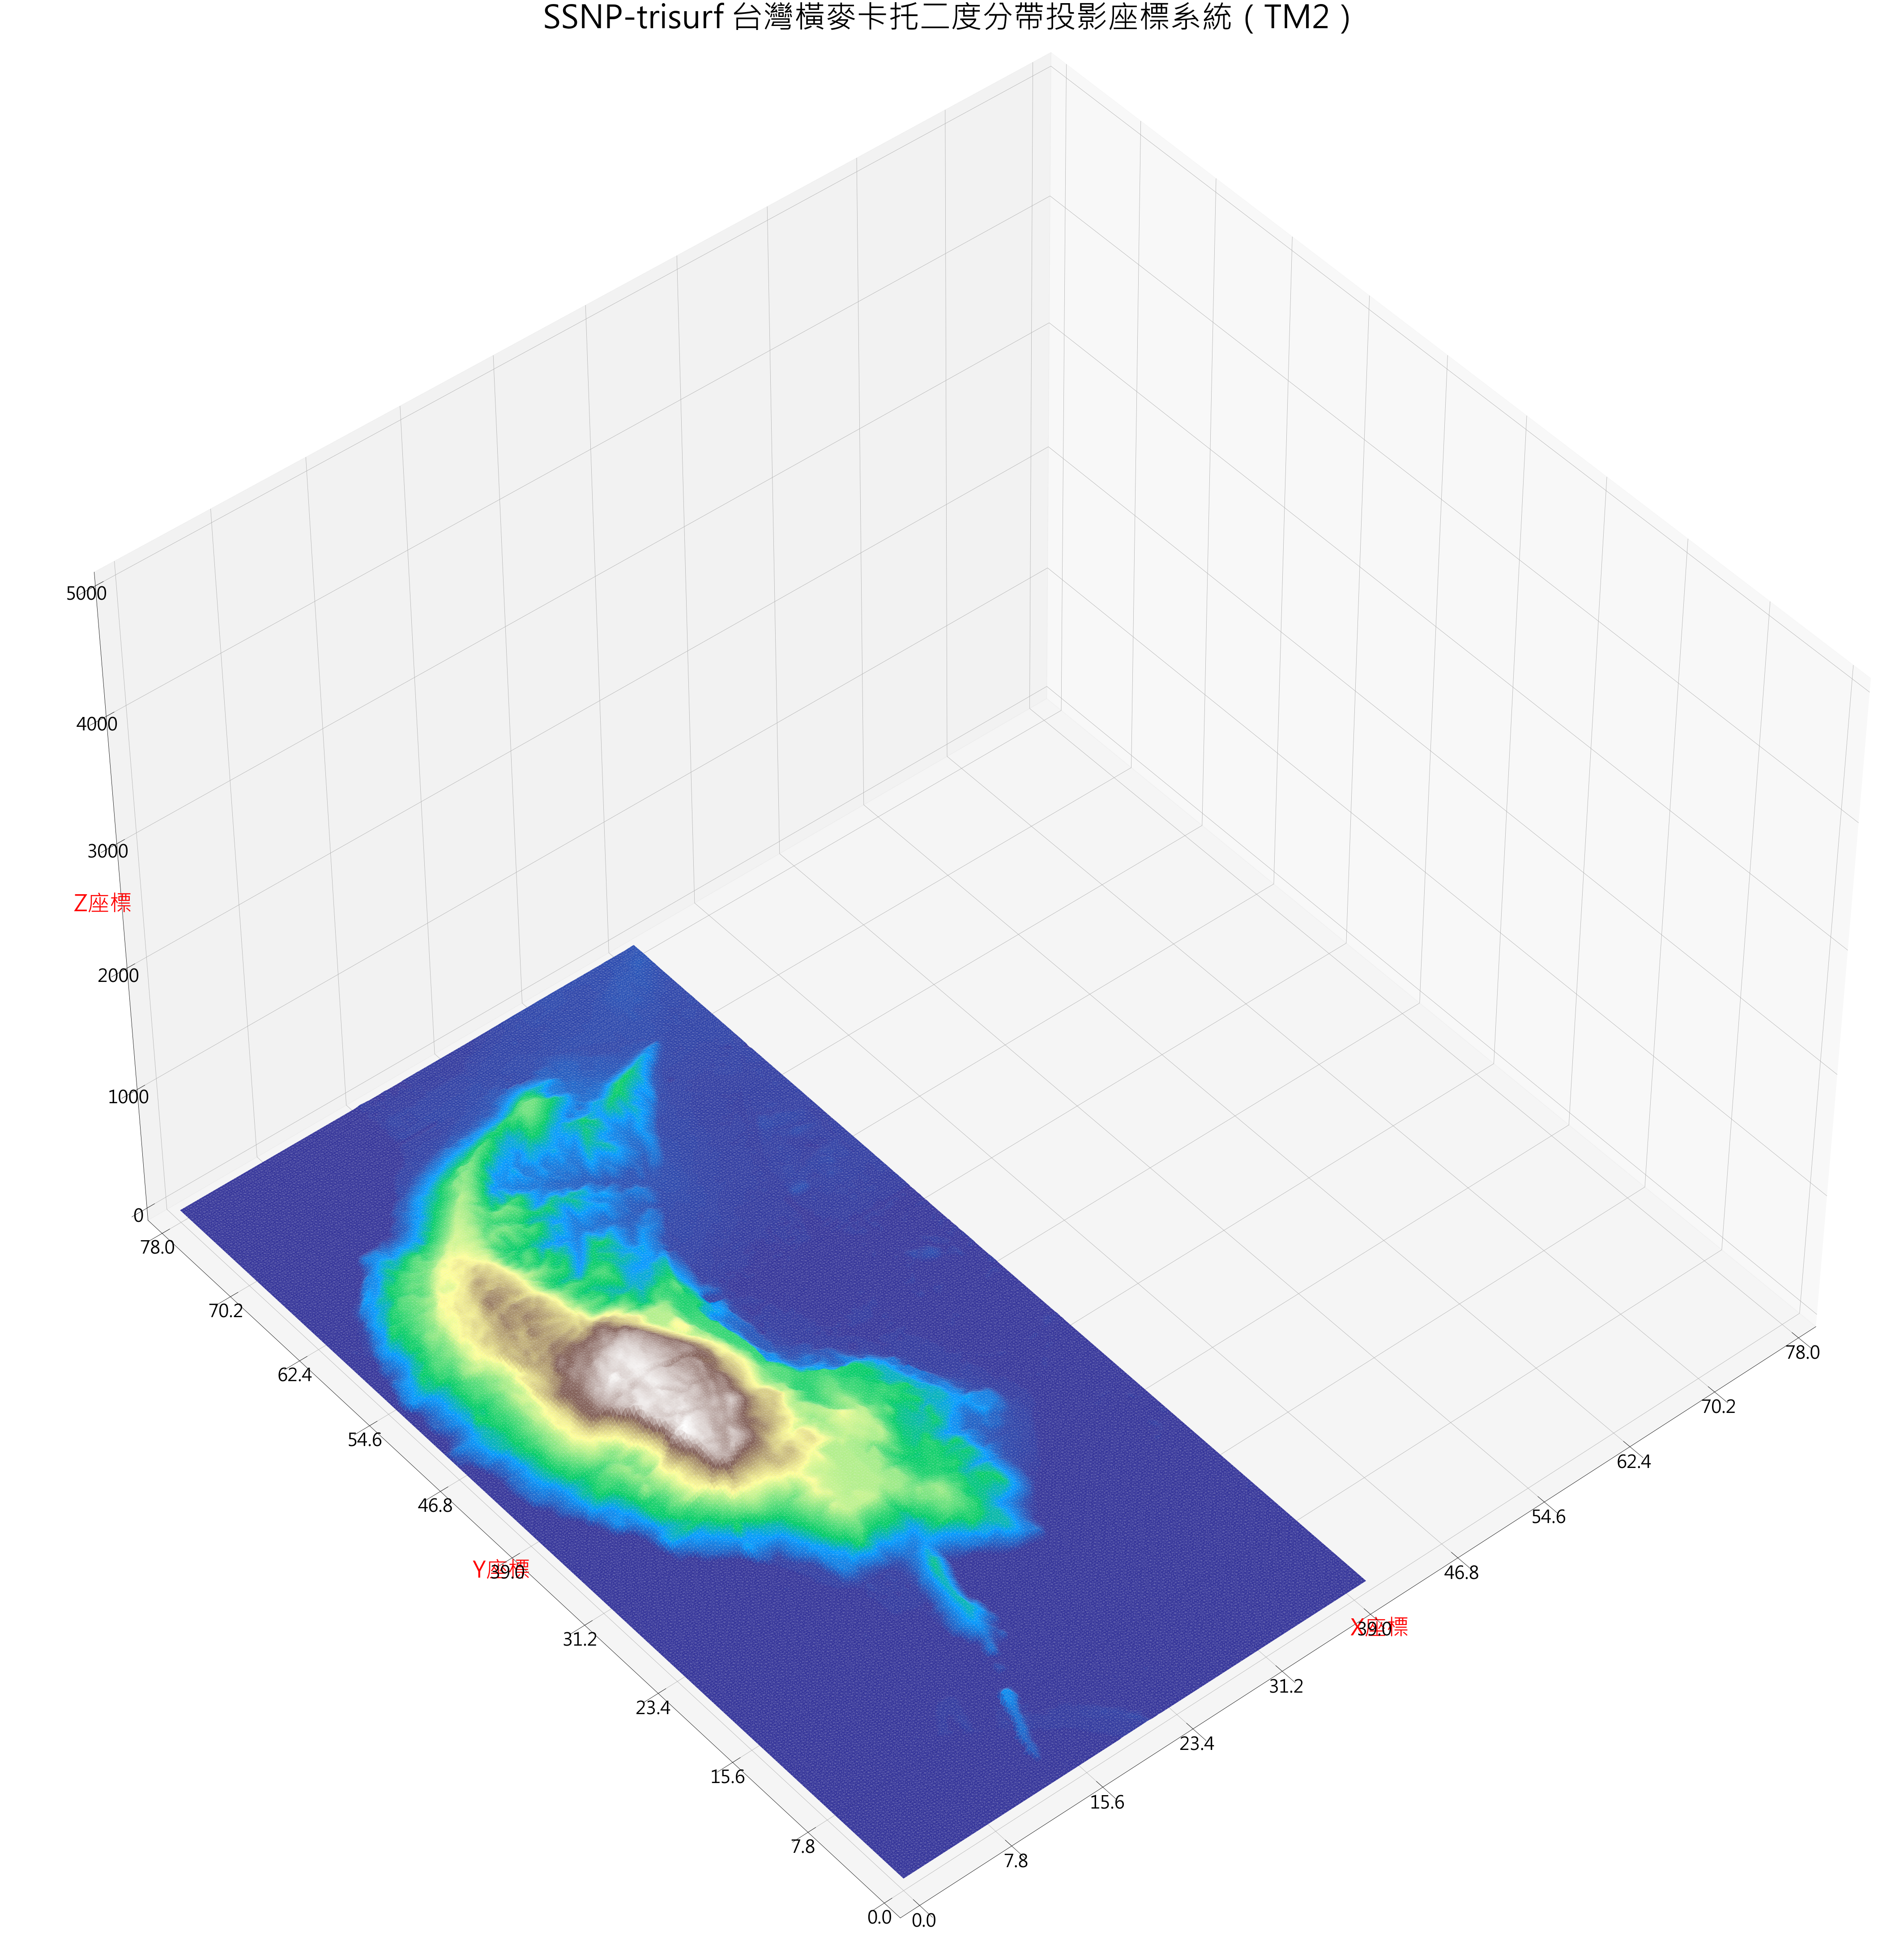

In [11]:
# stl-SSNP-03.py
# 2021-11-18
#
# read dem-all-7.csv file
# transposed array, work for space delimeter
# x,y,z = np.loadtxt(path_data + 'dem_all-7.csv', unpack=True)
#
# run on myBinder.org JupyterLab
# 程式檔 path is '/home/jovyan/STL'
# 資料檔 path is '/home/jovyan/STL/data'
# 圖形檔 path is '/home/jovyan/STL/3Dstl'
#
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
import pprint
#from stl import mesh
#
from matplotlib import cm # colormap
from shapely.geometry import MultiPoint
from shapely.ops import triangulate
#from stl import mesh
#
path_data  = './data/'
path_3Dstl = './3Dstl/'
#
matplotlib.rcParams['pdf.fonttype'] = 42
myfont = fontManager.FontProperties(fname='/0_sdr/Ecliptic Graph/fonts/MSJH.ttc')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
#
float_To_int = np.vectorize(np.int32)
#
data = np.loadtxt(path_data + 'dem-all-7.csv',delimiter=',',dtype='float')
min_item = np.amin(data, axis=0) # axis=0 --> min of each column
max_item = np.amax(data, axis=0) # axis=0 --> max of each column
print ('Left Down point:', float_To_int(min_item[0]), float_To_int(min_item[1]))
print ('Right Up point: ' , float_To_int(max_item[0]), float_To_int(max_item[1]))
print ('height (min, max)', min_item[2], max_item[2])
print ('\n')
#
# Left Down point: 0, 0
# Right Up point:  4000, 7800
# height (min, max) 0, 357.21
#
TM2_X = float_To_int(data[..., 0]) # 二度分帶 X座標
TM2_Y = float_To_int(data[..., 1]) # 二度分帶 Y座標
TM2_Z = data[..., 2]               # DEM file z value, float type
#
# X @ range(0, 4020, 20)
# Y @ range(0, 7820, 20)
# 4020/20 ==> 201
# 7820/20 ==> 391
#
# XYlist is sorted (x, y), first order is y, then x
#
XYlist = list(zip(TM2_X,TM2_Y))
#
# X, Y value
X = np.arange(0, 4020, 20)
Y = np.arange(0, 7820, 20)
Xmesh, Ymesh = np.meshgrid(X, Y)  # x-y 平面的網格
#
pprint.pprint(Xmesh[-1])
print ('\n')
pprint.pprint(Ymesh[-1])
print ('\n')
#
# 7800/20 ==> 391
# 4020/20 ==> 201
Zmesh = np.zeros(shape=(391,201),dtype=np.float16)
i = 0
j = 0
#
for y in np.arange(0, 7820, 20) :
    z = np.zeros(shape=(201),dtype=np.float16)
    zi = 0
    for x in np.arange(0, 4020, 20):
        if (x,y) in XYlist :
            # print(str(zi), list([x,y]), TM2_Z[i])
            z[zi] = TM2_Z[i]
            i = i + 1
        else :
            # print(str(zi))
            z[zi] = 0.0
        # end if
        zi = zi + 1
    #end for
    # pprint.pprint(z)
    Zmesh[j] = z
    j = j + 1
#end for
#
print ('\n')
# pprint.pprint(Zmesh[-1])
#
factor_3D = 0.01
Xmesh_3D = np.around(factor_3D * Xmesh, 1)
Ymesh_3D = np.around(factor_3D * Ymesh, 1)
Zmesh_3X = Zmesh
Zmesh_3D = Zmesh_3X.astype(int)
#
XYZ_list = np.stack([Xmesh_3D, Ymesh_3D, Zmesh_3D], axis=2)
xyz_list = list(XYZ_list)
#
print(str(np.shape(xyz_list)))
final_list = []
for row in xyz_list :
    row_list = []
    for item in row :
        row_list.append(list(item))
    # end for
    final_list.append(row_list)
# end for
#
xyz_list = [xyz for sublist in final_list for xyz in sublist]
"""
which means:
flat_list = []
for sublist in t:
    for item in sublist:
        flat_list.append(item)
    # end for
# end for
#
"""
print(xyz_list[0:20])
#
xs = [xyz[0] for xyz in xyz_list]
ys = [xyz[1] for xyz in xyz_list]
zs = [xyz[2] for xyz in xyz_list]
#
fig = plt.figure(figsize=(78,78))
ax  = fig.add_subplot(1,1,1, projection='3d')
#
plt.xlim(0, 78)    # xlim, ylim, zlim need to be same
plt.ylim(0, 78)    
ax.set_zlim(0, 5000)
#
x_ticks = np.linspace(0,78,11)
y_ticks = np.linspace(0,78,11)
z_ticks = np.linspace(0,5000,11)
#
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.tick_params(labelsize=40)
#
plt.xlabel   ('X座標', fontproperties=myfont, fontsize=50)
plt.ylabel   ('Y座標', fontproperties=myfont, fontsize=50)
ax.set_zlabel('Z座標', fontproperties=myfont, fontsize=50)
#
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.zaxis.label.set_color('red')
#
# 此程式碼使輸出之3D圖像Z軸比例更正確
plt.gca().set_aspect('auto', adjustable='box') # set X,Y same ratio & scale
#
# 設定子圖的標題
ax.set_title('SSNP-trisurf 台灣橫麥卡托二度分帶投影座標系統（TM2）', fontproperties=myfont, fontsize=70)
#
# ---------------------------------------------------------------------------------------------------
#
ax.plot_trisurf(xs, ys, zs, cmap=plt.cm.terrain)
ax.view_init(elev=45, azim=230)
plt.draw()
#
# plt.savefig(path_3Dstl + "SSNP-trisurf.png",format="png",dpi=300, bbox_inches='tight')
plt.savefig(path_3Dstl + "SSNP-trisurf-terrain.pdf",format="pdf",dpi=300, bbox_inches='tight')
print ('Done')
